                                            Crop Recomendation System

Agriculture is vital for food security and economic stability. However, crop selection challenges arise from factors like soil type, climate, and pH levels. The Crop Recommendation System, powered by machine learning, evaluates environmental conditions to provide personalized crop suggestions. By empowering informed decisions, it enhances productivity and sustainability in agriculture.

Import respective modules to python notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

Read CSV file and print 5 initial and final rows and columns

In [2]:
df = pd.read_csv("S:/Mini project/Crop_recommendation.csv") 

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Display the number of rows and columns.

In [5]:
df.shape

(2200, 8)

Display datatype and non-null count of the
given dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Display the Null values in each Attribute.

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.duplicated().sum()

0

Display description of all attributes in given
dataset.

In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df['label'].unique().size

22

In [11]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

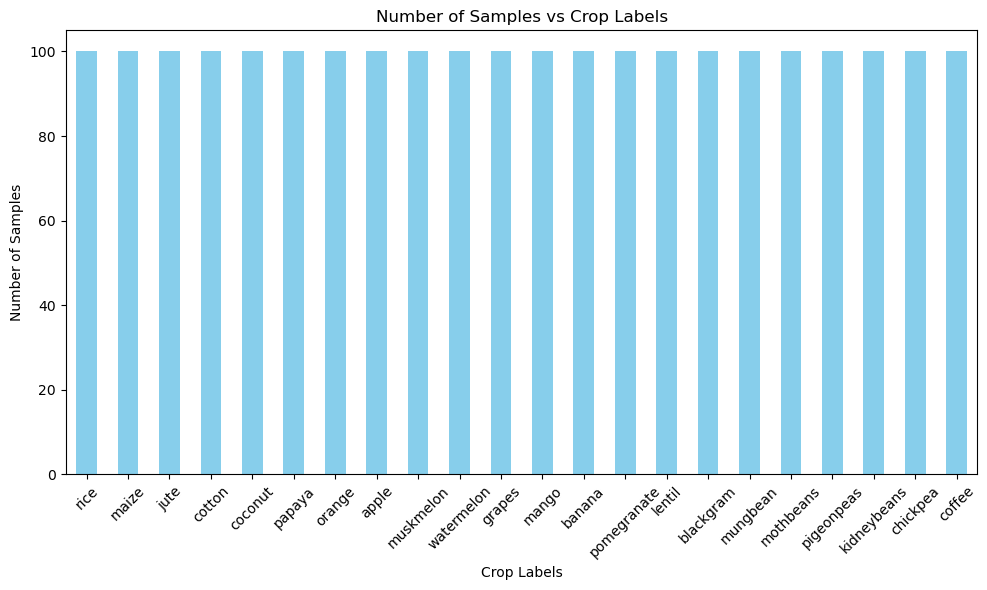

In [13]:
label_counts = df['label'].value_counts()

# Plotting the graph
label_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Crop Labels')
plt.ylabel('Number of Samples')
plt.title('Number of Samples vs Crop Labels')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

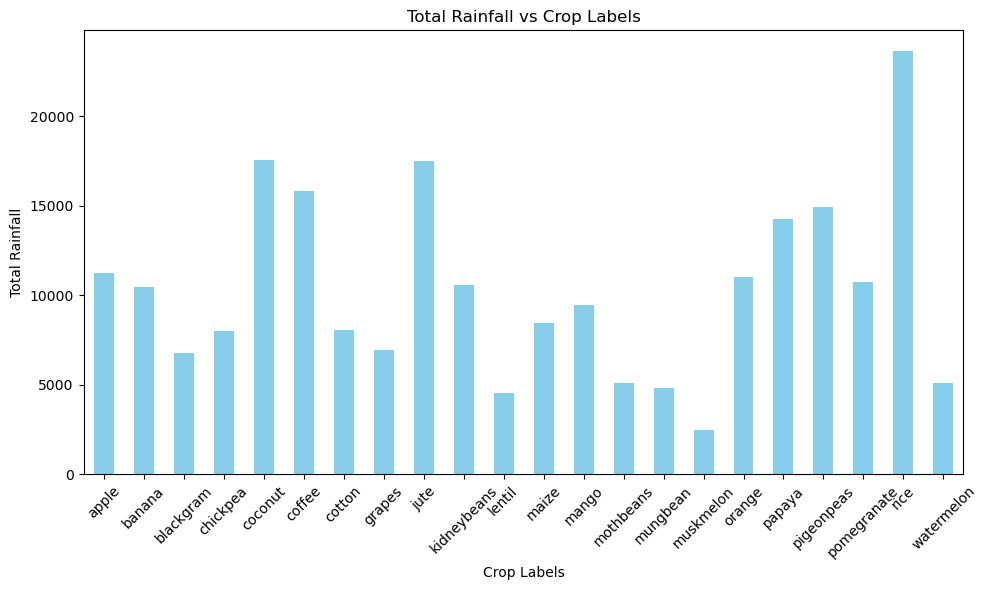

In [14]:
rainfall_by_crop = df.groupby('label')['rainfall'].sum()

# Plotting the graph
rainfall_by_crop.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Crop Labels')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall vs Crop Labels')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

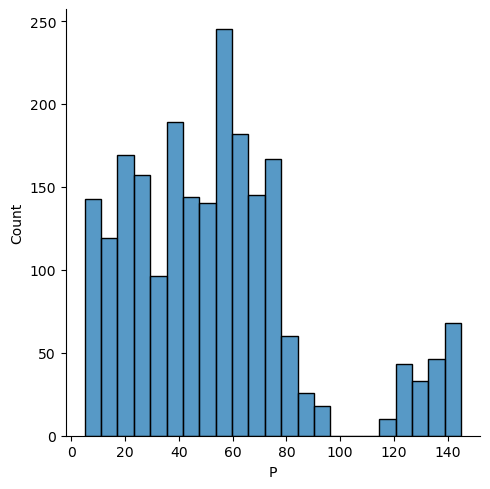

In [15]:
import warnings
warnings.filterwarnings("ignore")
sns.displot(df['P'])
plt.show()

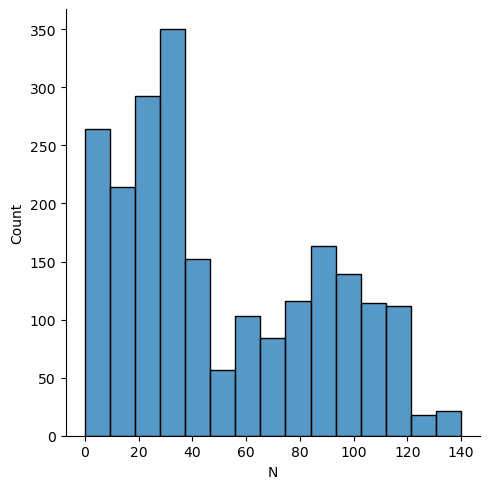

In [16]:
sns.displot(df['N'])
plt.show()

In [17]:
#df_dict={'rice': 1,'maize': 2,'jute': 3,'cotton': 4,'coconut': 5,'papaya': 6,'orange': 7, 'apple': 8,'muskmelon': 9,  'watermelon': 10, 'grapes': 11,'mango': 12,  'banana': 13, 'pomegranate': 14, 'lentil': 15,   'blackgram': 16,'mungbean': 17, 'mothbeans': 18,'pigeonpeas': 19,'kidneybeans': 20,'chickpea': 21,'coffee': 22}

#crop['label'] = crop['label'].map(crop_dict)

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['label_Numeric']=label_encoder.fit_transform(df['label'])
print(df)

        N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      label_Numeric  
0                20  
1                20  
2                20  
3          

In [19]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [20]:
df = df.drop(columns=['label'])

In [21]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label_Numeric
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [22]:
print(df['label_Numeric'])

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label_Numeric, Length: 2200, dtype: int32


In [23]:
X=df.drop('label_Numeric', axis = 1)
y=df['label_Numeric']

In [24]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [25]:
y.head()

0    20
1    20
2    20
3    20
4    20
Name: label_Numeric, dtype: int32

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [27]:
X_train.shape

(1760, 7)

In [28]:
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [29]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [30]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [31]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [32]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.9636363636363636
GaussianNB model with accuracy: 0.9954545454545455
SVC model with accuracy: 0.9681818181818181
KNeighborsClassifier model with accuracy: 0.9568181818181818
DecisionTreeClassifier model with accuracy: 0.9863636363636363
ExtraTreeClassifier model with accuracy: 0.884090909090909
RandomForestClassifier model with accuracy: 0.9931818181818182
BaggingClassifier model with accuracy: 0.9931818181818182
GradientBoostingClassifier model with accuracy: 0.9818181818181818
AdaBoostClassifier model with accuracy: 0.09545454545454546


In [33]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9931818181818182

In [34]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'label_Numeric'],
      dtype='object')

In [35]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [36]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label_Numeric
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [37]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)
print(predict)

[17]


In [38]:
predict_label = label_encoder.inverse_transform([predict])
print(predict_label[0])

papaya


In [39]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N              2200 non-null   int64  
 1   P              2200 non-null   int64  
 2   K              2200 non-null   int64  
 3   temperature    2200 non-null   float64
 4   humidity       2200 non-null   float64
 5   ph             2200 non-null   float64
 6   rainfall       2200 non-null   float64
 7   label_Numeric  2200 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 129.0 KB


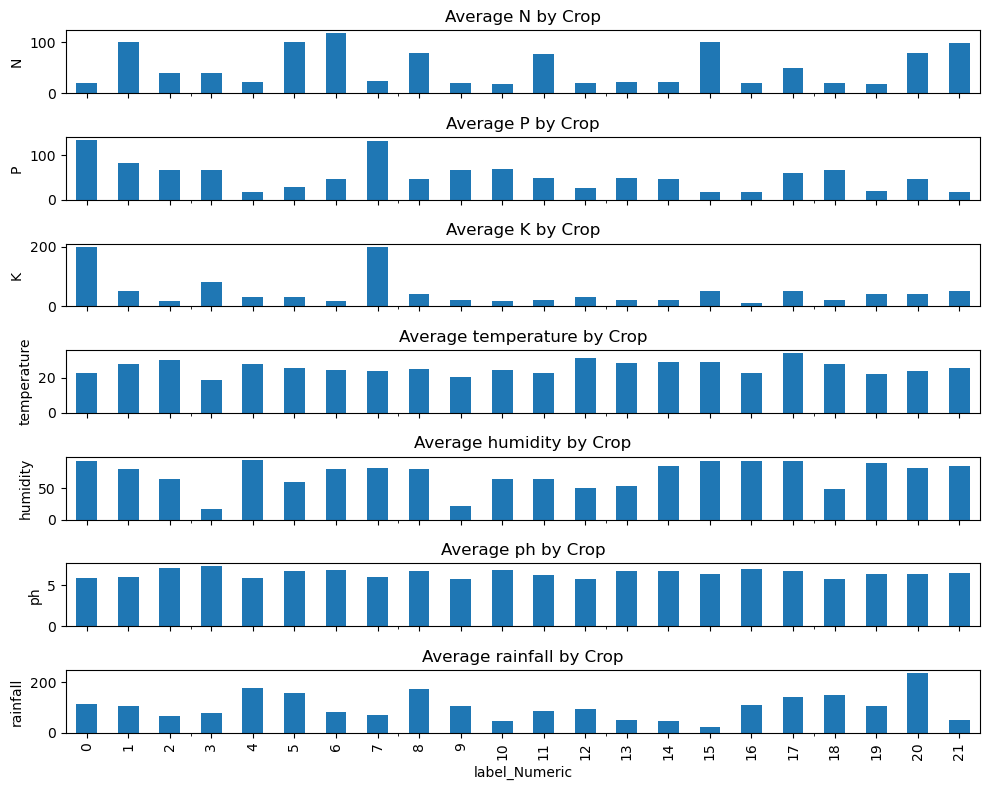

In [41]:
avg_values_by_crop = df.groupby('label_Numeric').mean()

# Extract parameters of interest for plotting
params = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Plotting
fig, axes = plt.subplots(nrows=len(params), ncols=1, figsize=(10, 8), sharex=True)

for i, param in enumerate(params):
    ax = axes[i]
    avg_values_by_crop[param].plot(kind='bar', ax=ax)
    ax.set_ylabel(param)
    ax.set_title(f'Average {param} by Crop')

plt.tight_layout()
plt.show()

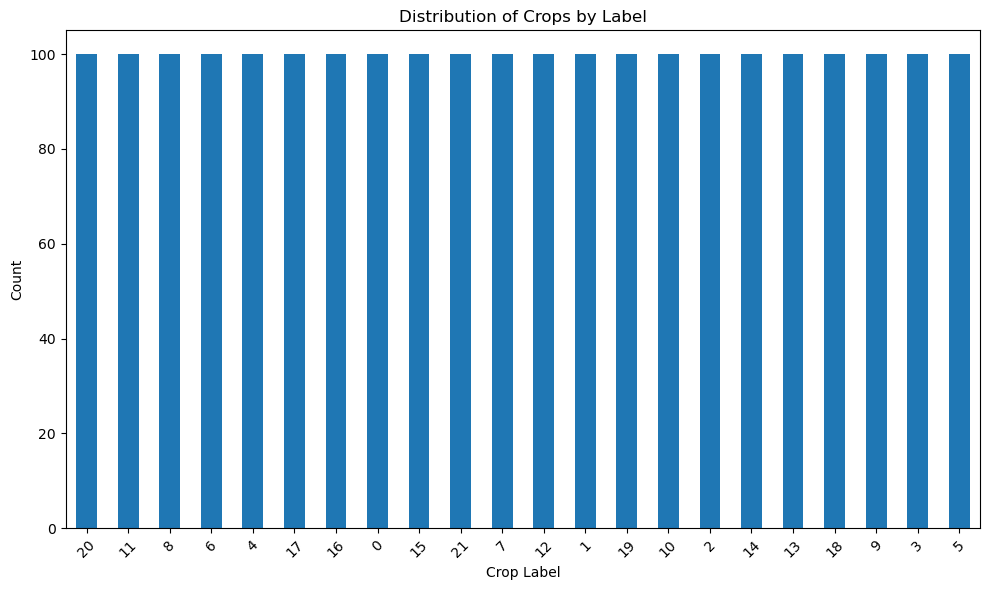

In [42]:
label_counts = df['label_Numeric'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.xlabel('Crop Label')
plt.ylabel('Count')
plt.title('Distribution of Crops by Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

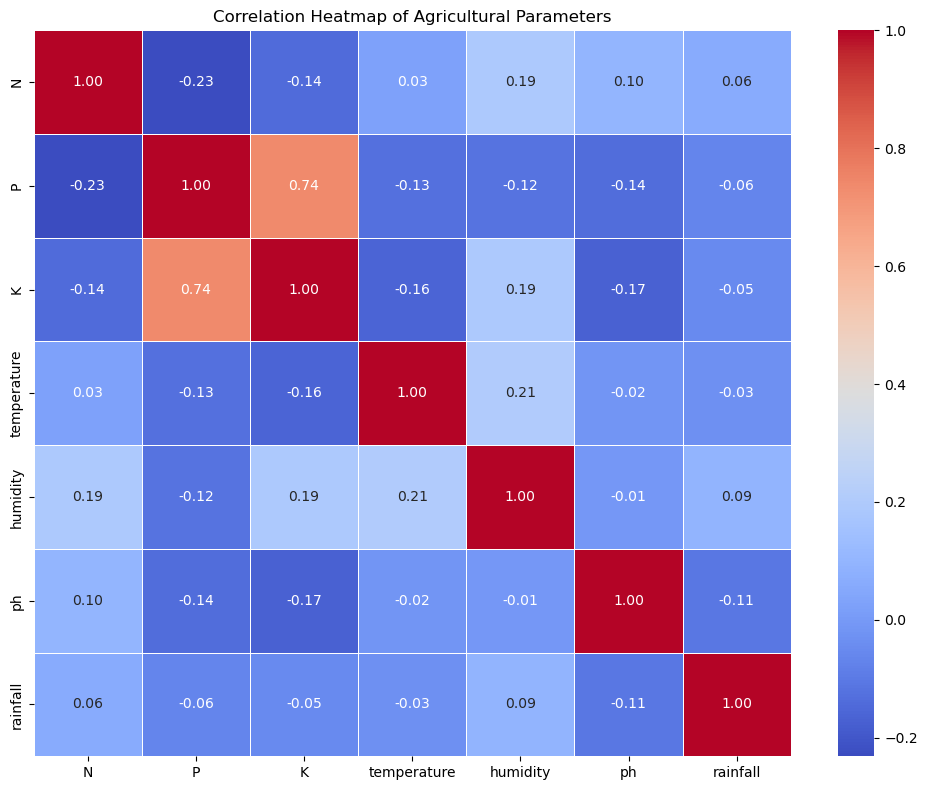

In [43]:
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Agricultural Parameters')
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'heatmap')]

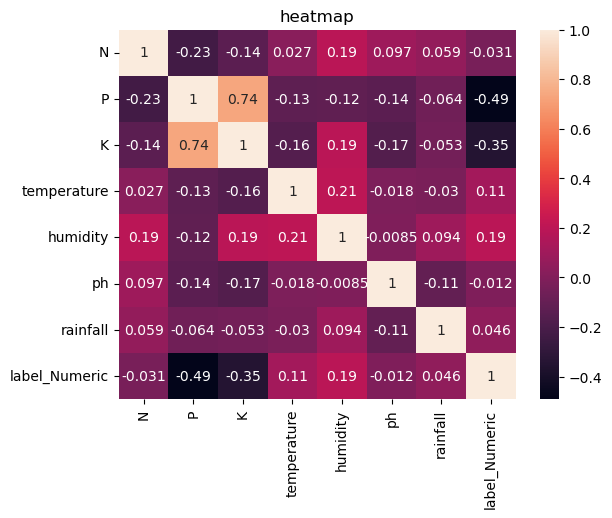

In [44]:
correlations=df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True).set(title='heatmap')

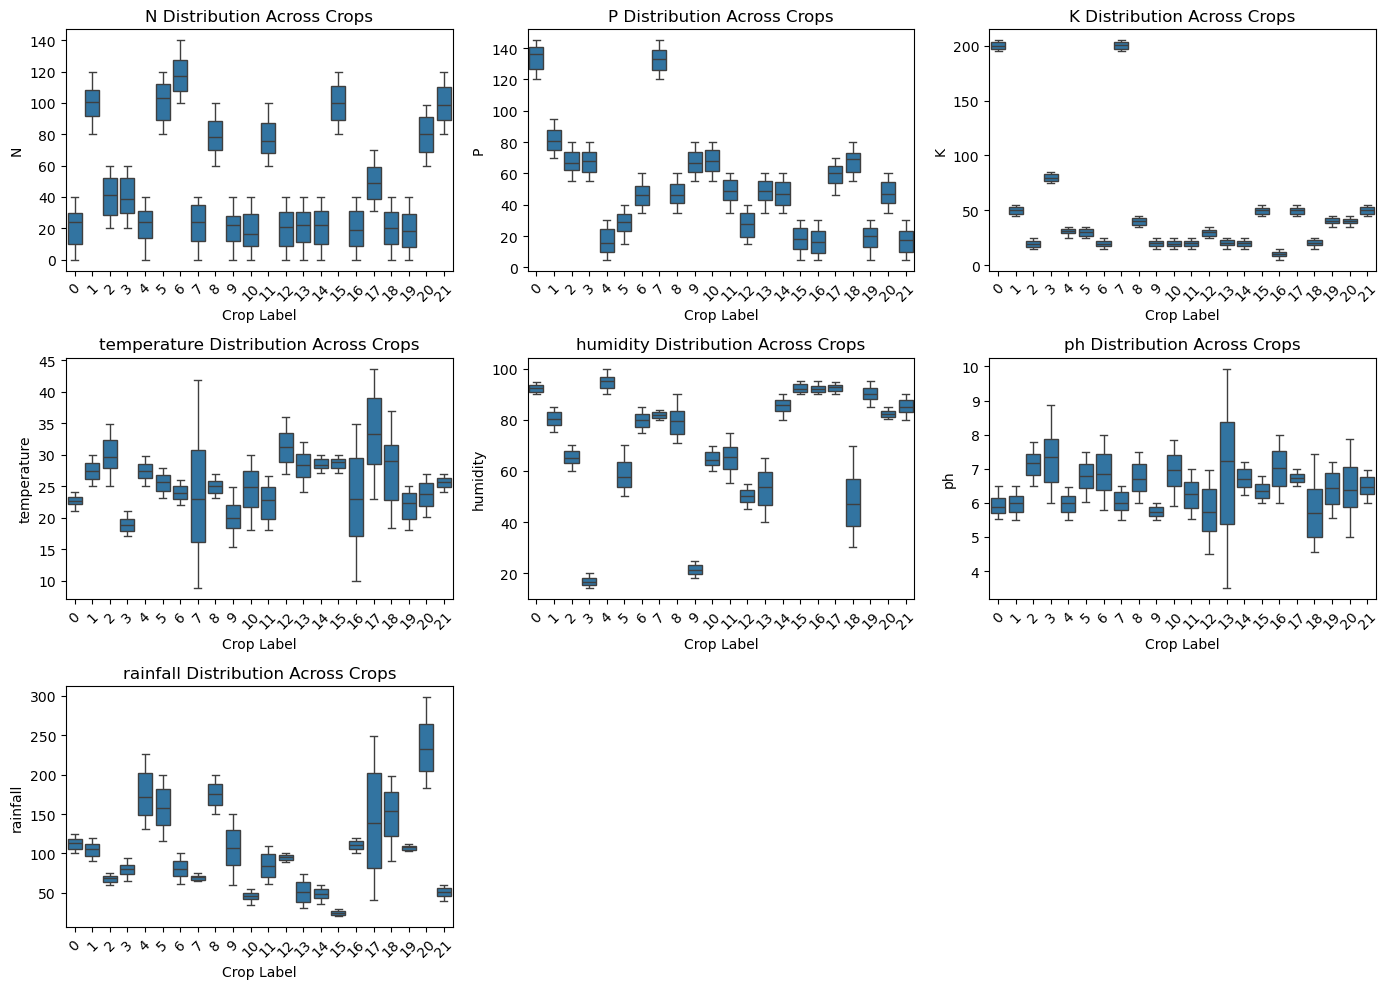

In [45]:
params = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
crop_labels = df['label_Numeric'].unique()

# Plotting parameter distribution across crops
plt.figure(figsize=(14, 10))
for i, param in enumerate(params, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='label_Numeric', y=param, data=df)
    plt.title(f'{param} Distribution Across Crops')
    plt.xlabel('Crop Label')
    plt.ylabel(param)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

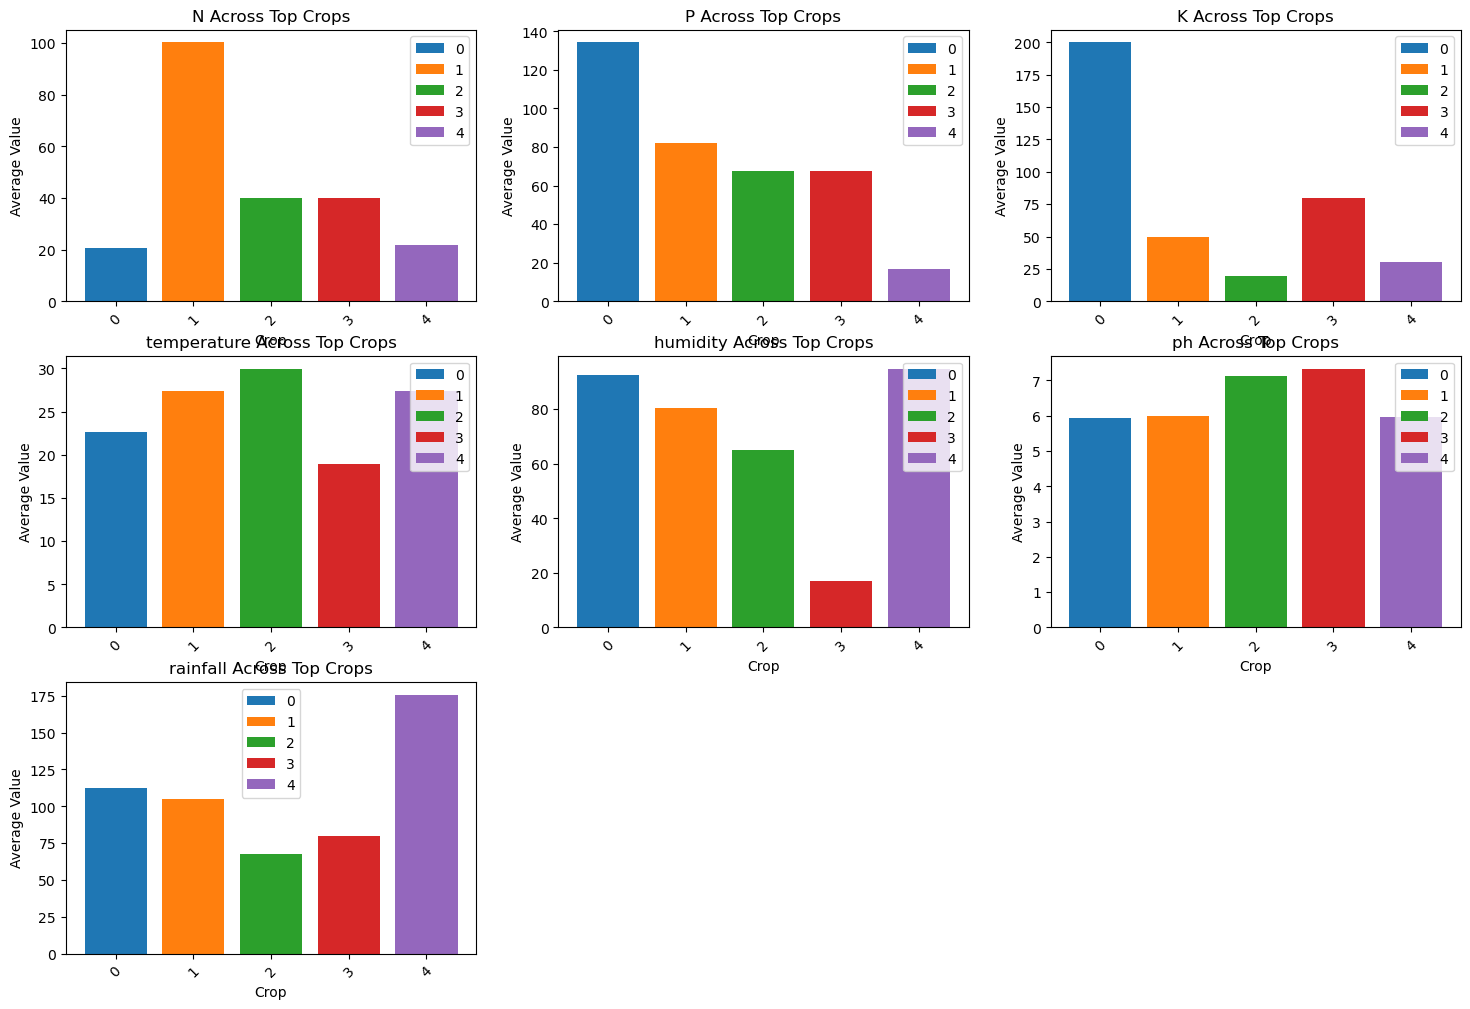

In [46]:
mean_params = df.groupby('label_Numeric')[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].mean()

# Select top crops based on frequency or any other criteria
top_crops = mean_params.index[:5]  # Select top 5 crops (you can adjust this number)

# Subset the dataframe for top crops
top_crops_data = mean_params.loc[top_crops]

# Plotting grouped bar plot for key parameters
plt.figure(figsize=(18, 12))

# Plot each parameter for top crops
for i, param in enumerate(top_crops_data.columns):
    plt.subplot(3, 3, i+1)  # Adjust subplot layout as needed
    for crop in top_crops_data.index:
        plt.bar(crop, top_crops_data.loc[crop, param], label=crop)

    plt.xlabel('Crop')
    plt.ylabel('Average Value')
    plt.title(f'{param} Across Top Crops')
    plt.xticks(rotation=45)
    plt.legend()

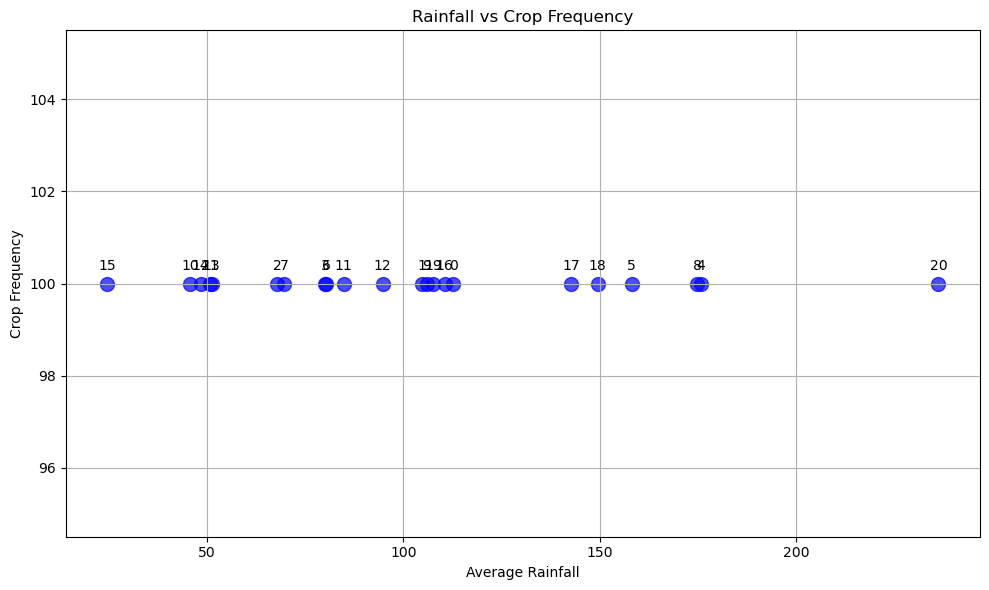

In [47]:
crop_frequency = df['label_Numeric'].value_counts()

# Calculate average rainfall for each crop
mean_rainfall = df.groupby('label_Numeric')['rainfall'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_rainfall, crop_frequency, marker='o', s=100, alpha=0.7, c='blue')

# Add labels and title
plt.title('Rainfall vs Crop Frequency')
plt.xlabel('Average Rainfall')
plt.ylabel('Crop Frequency')

# Add annotations for crop labels
for crop, freq in zip(mean_rainfall.index, crop_frequency):
    plt.annotate(crop, (mean_rainfall[crop], freq), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.tight_layout()
plt.show()

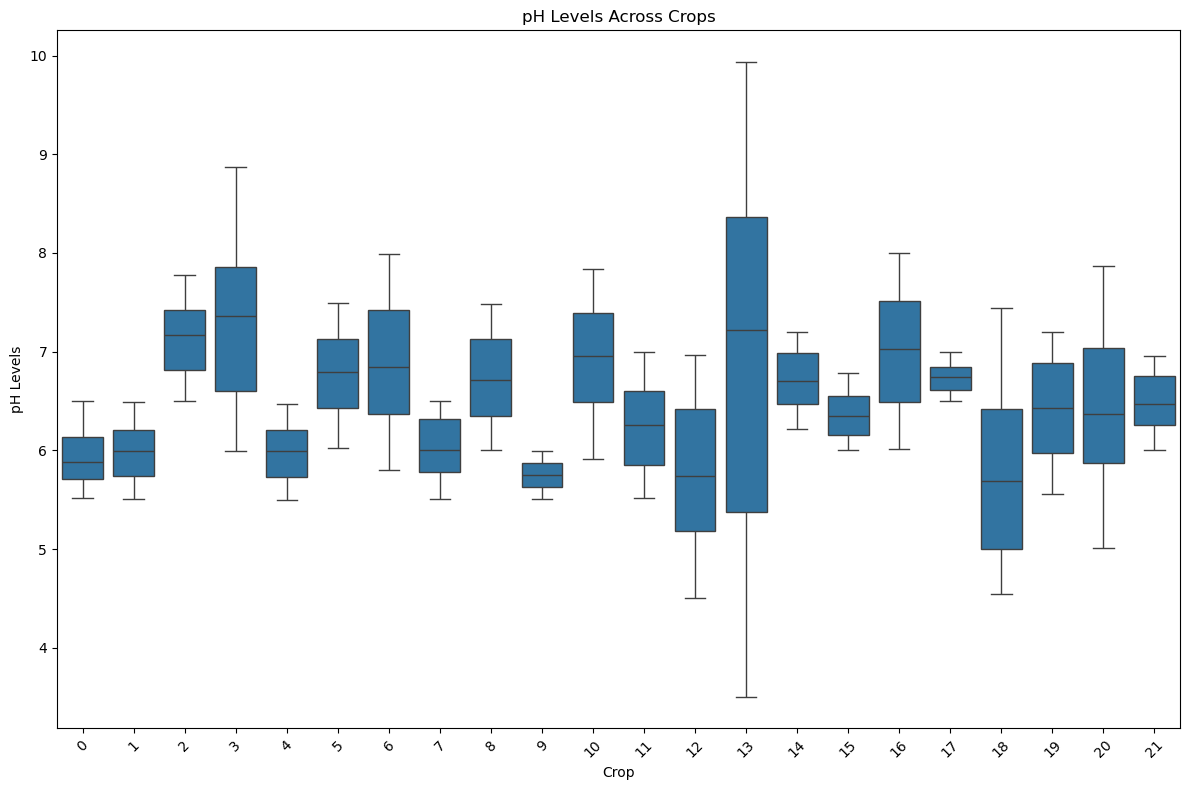

In [48]:
# Box plot of pH levels across crops
plt.figure(figsize=(12, 8))
sns.boxplot(x='label_Numeric', y='ph', data=df)
plt.title('pH Levels Across Crops')
plt.xlabel('Crop')
plt.ylabel('pH Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

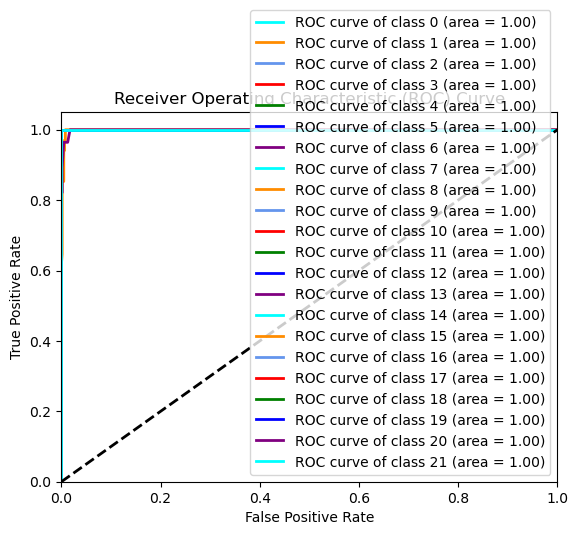

In [49]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming df is already loaded and preprocessed
# X and y are defined and the classifier is trained

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Binarize the labels for ROC curve
y_binarized = label_binarize(y_encoded, classes=np.arange(len(label_encoder.classes_)))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_score = classifier.predict_proba(X_test)

# If y_score is not in the correct format, reshape it
if len(y_score) != len(X_test):
    y_score = np.array([proba[:, 1] for proba in y_score]).T

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.99


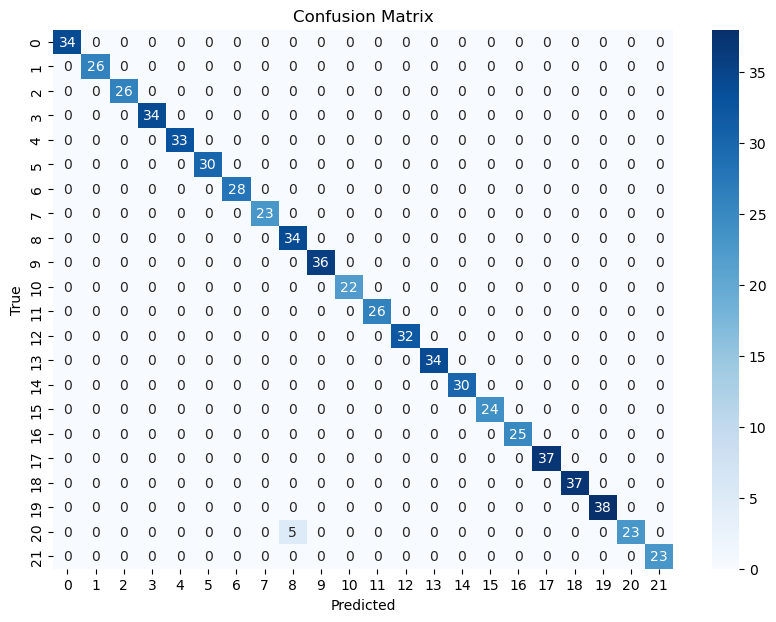

In [50]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.87      1.00      0.93        34
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        25
    

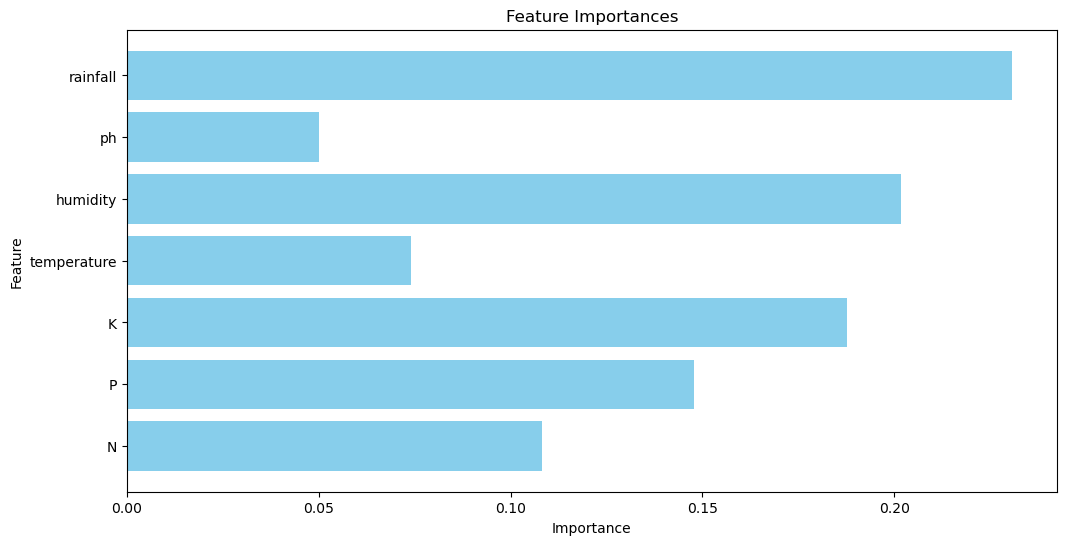

In [53]:
#Classification Report
# Predict the class for the test set
y_pred = classifier.predict(X_test)

# Inverse binarize the test and predicted labels to get back the original labels
y_test_original = label_encoder.inverse_transform(np.argmax(y_test, axis=1))
y_pred_original = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

classification_report_str = classification_report(y_test_original, y_pred_original)
print("Classification Report:")
print(classification_report_str)
accuracy = accuracy_score(y_test_original, y_pred_original)
print(f"Accuracy: {accuracy:.2f}")

feature_importances = classifier.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.87      1.00      0.93        34
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        25
    

<Figure size 640x480 with 0 Axes>

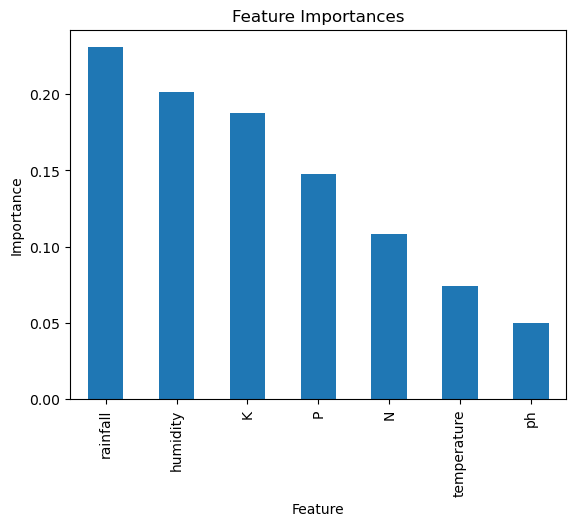

In [52]:
# Predict the class for the test set
y_pred = classifier.predict(X_test)

# Inverse binarize the test and predicted labels to get back the original labels
y_test_original = label_encoder.inverse_transform(np.argmax(y_test, axis=1))
y_pred_original = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

# Print classification report
classification_report_str = classification_report(y_test_original, y_pred_original)
print("Classification Report:")
print(classification_report_str)



# Print accuracy
accuracy = accuracy_score(y_test_original, y_pred_original)
print(f"Accuracy: {accuracy:.2f}") 


# Feature Importances
feature_importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n")
print(feature_importance_df) 

# Plot Feature Importances
plt.figure()
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()